# CSCI-UA 0480-042 Computer Vision
## Homework 1

In this assignment, you will be introduced to few Python libraries that will be needed for this course. This assumes that you can write basic Python programs. If you do not know how to code in Python, this would be a good time for you to learn.

The main goals of this assignment are to introduce how you could:

1. Use jupyter notebooks.
2. Do basic vector operations.
3. Use Matplotlib to plot a function, and to also display a collection of images.
4. Summarize a neural network architecture.
5. Understand the convolution operation and implement it.
6. Create your own first CNN !


You may have already worked with these libraries before, in which case we hope this could be a nice review.

Also accompanying each section below, there are a few questions (**8 questions in total**) where Q6 and Q7 have two parts. We have added a ***"TODO:"*** comment at every place where you need to code. Please give your answers in the markdown space provided(**Answer:**) where written answer(Q4, Q6.2) is requred. With each question the breakup of points is also mentioned along with references that you can use to answer the question.


Submission :

1. Download the .ipynb file with your solution from jupyter menu (File -> Download as -> Notebook(.ipynb)).
2. Download the pdf file with your solution from jupyter menu (File -> Download as -> PFD via LaTeX(.pdf)).

Submit both files on brightspace and make sure the submitted files have your solutions.



### Note : Make sure that the right kernel (Python [conda env:csciua-0480042-fall]) is selected before running the cells. Check the top right of your notebook, below Logout/Control panel button. You can change kernel from jupyterhub menu (Kernel -> Change Kernel -> Python [conda env:csciua-0480042-fall] )

### Numpy

[NumPy](https://numpy.org/) is a highly popular Python library within the scientific community. With NumPy, you can operate on n-dimensional arrays and perform a number of mathematical operations on them. For example, you can generate an [array of random numbers](https://numpy.org/doc/stable/reference/random/index.html), compute element-wise [sum/difference between 2 arrays](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs), find [the L2 norm of an array](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html), etc.

NumPy is mostly C under the hood, and it's highly optimized. So it's highly recommended that you use NumPy whenever possible. We will show some basic operations here. This is by no means complete - NumPy is a huge library and it's impossible to cover everything.

First, let's import numpy:

In [32]:
import numpy as np

You can convert a 2d list of numbers into a numpy array using:

In [33]:
nums = [[1, 2, 3, 4], [5, 6, 7, 8]]
np.array(nums)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

`linspace(start, end, n)` can be used to generate an array of `n` evenly spaced numbers from `start` to `end` (both inclusive).

In [34]:
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

You can multiply this array with a scalar:

In [35]:
2*np.linspace(0, 10, 21)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

A 1d array can also be reshaped into a 2d array. To see the dimensions of a numpy array `arr`, use `arr.shape`. 

In [36]:
arr = np.linspace(0, 99, 100)
new_arr = arr.reshape((10, 10))
print("Original shape", arr.shape)
print("Reshaped array shape", new_arr.shape)
print("Reshaped array:\n", new_arr)

Original shape (100,)
Reshaped array shape (10, 10)
Reshaped array:
 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


You can learn more about NumPy from [the quickstart page](https://numpy.org/doc/stable/user/quickstart.html).

## Question 1 [5%]

Find the dot product of these 2 arrays using NumPy:

$$
A = \begin{bmatrix}
19 & 7 & -15 \\
12 & 59 & 27 \\
\end{bmatrix}
\\
B = \begin{bmatrix}
3 \\
-7 \\
-13
\end{bmatrix}
$$


In [37]:
# TODO:
import numpy as np
A = np.array([[19, 7, -15], [12, 59, 27]])
B = np.array([[3], [-7], [-13]])
# Compute dot product A.B and print it
print(A.dot(B))

[[ 203]
 [-728]]


## Question 2 [5%]

Create 2 matrices:

1. C: [[1, 2, 3], [4, 5, 6]]
2. D: [[10, 11, 12], [13, 14, 15]]

and concatenate them to get this matrix:

[[1, 2, 3], [4, 5, 6], [10, 11, 12], [13, 14, 15]]

In [38]:
# TODO:
import numpy as np
C = np.array([[1,2,3],[4,5,6]])
D = np.array([[10,11,12],[13,14,15]])
# Concatenate and print the resulting matrix
print(np.concatenate((C,D)))

[[ 1  2  3]
 [ 4  5  6]
 [10 11 12]
 [13 14 15]]


### Plotting in Python

Matplotlib is the most commonly used plotting Python library. There are other libraries out there (such as seaborn, bokeh, etc.), but we will focus on Matplotlib.

Our first step would be to plot the sigmoid activation function:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

In [39]:
x = np.linspace(-10, 10, 101) # get 101 data points
sigma = 1/(1+ np.exp(-x))     # get f(x)

In [40]:
print(x.shape, sigma.shape)

(101,) (101,)


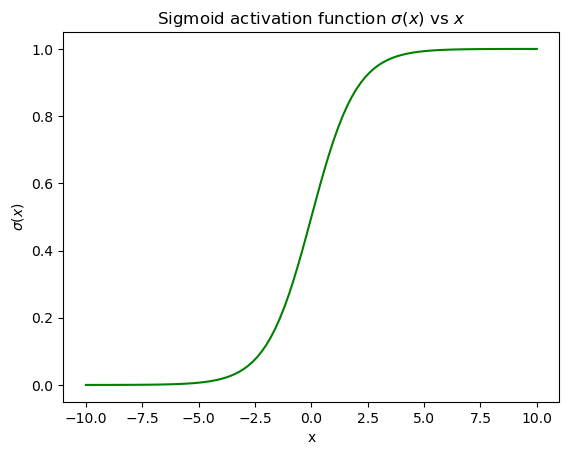

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, sigma, 'g-', label="sigma") # plot x, f(x) 
ax.set_xlabel('x')
ax.set_ylabel('$\sigma(x)$')
ax.set_title('Sigmoid activation function $\sigma(x)$ vs $x$')
plt.show()

## Question 3 [10%]

On the same graph:

1. Plot the `tanh` activation function (using a blue line). For reference,
$$
\tanh{x} = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
2. Draw a vertical dotted line at $x=0$.
3. Add a legend indicating what the different lines are.

Here's an excellent article (although slightly advanced) that gives a quick intro to Matplotlib: https://pbpython.com/effective-matplotlib.html. Some sections use Pandas, which is another Python library used by the data science community. You don't need to understand how it works, but just know that in Pandas, you can visualize data by calling a plot method on the data object (known as a dataframe in Pandas vernacular). This effectively calls matplotlib in the background.

Matplotlib documentation: https://matplotlib.org/3.3.3/contents.html. 

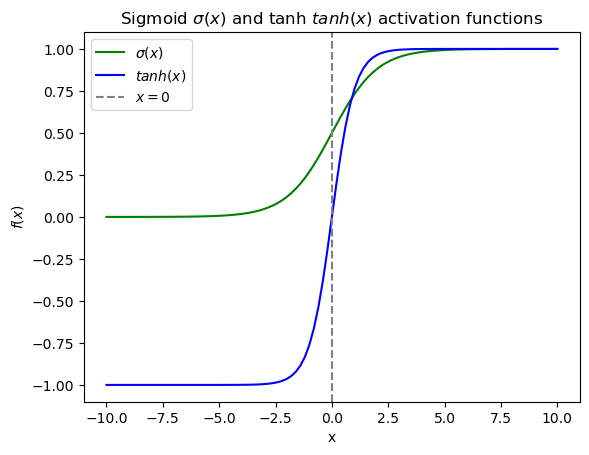

In [42]:
# TODO: Write code to plot on the same figure

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 101) # get 101 data points
sigma = 1/(1+ np.exp(-x)) 
tanh = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
fig, ax = plt.subplots()

ax.plot(x, sigma, 'g-', label="$\sigma(x)$")
ax.plot(x, tanh, 'b-', label="$tanh(x)$")
ax.axvline(x=0, linestyle="dashed", label="$x=0$", color="gray")

ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')

ax.set_title('Sigmoid $\sigma(x)$ and tanh $tanh(x)$ activation functions')

ax.legend()
plt.show()

# below line is to display the figure with plots
#fig


Now let's try to display a group of images using Matplotlib. We have provided some sample images from Imagenet dataset in the `img` folder. This dataset is mainly used to train neural nets for object recognition task. For this, we will need a library called `PIL` (Python Imaging Library).<br>
Reference: PIL : https://pillow.readthedocs.io/en/3.0.x/reference/Image.html <br>
Reference: glob : https://docs.python.org/3/library/glob.html <br>

Plotting images :
['img/n02121808_1421_domestic_cat.jpg', 'img/n07749582_16107_lemon.jpg', 'img/n02206856_2865_bee.jpg', 'img/n02802426_12131_basketball.jpg', 'img/n02324045_3738_rabbit.jpg', 'img/n02118333_27_fox.jpg', 'img/n02509815_27612_red_panda.jpg', 'img/n02787622_3030_banjo.jpg']


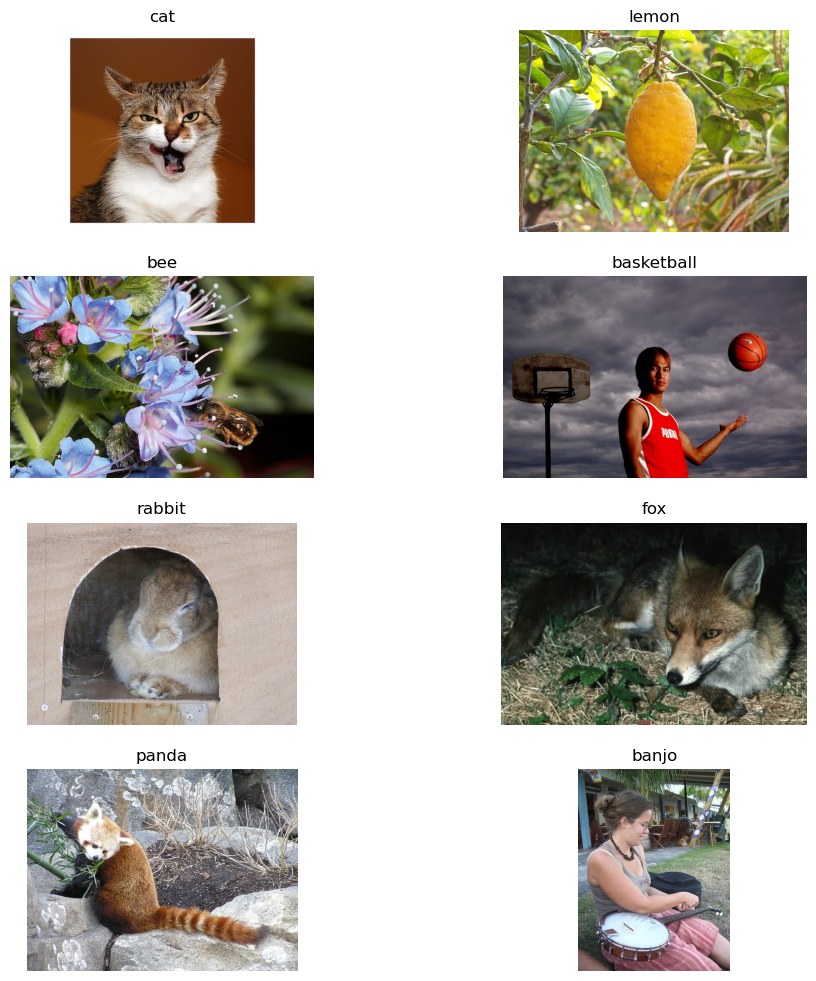

In [43]:
from PIL import Image 
import glob

img_paths = glob.glob('img/**.jpg')
n_images = len(img_paths)

print("Plotting images :")
print(img_paths)

fig, ax = plt.subplots(n_images//2, 2, figsize=(10, 10))
fig.tight_layout()

for i in range(n_images):
    img_path = img_paths[i]
    img_data = Image.open(img_path)
    row, col = i//2, i%2
    label = img_path.split('_')[-1].split('.')[0]
    ax[row][col].imshow(img_data)
    ax[row][col].set_title(label)
    ax[row][col].axis('off')

### ResNet

In this course, we will use PyTorch to build and train neural networks. Although PyTorch will be introduced in a later assignment, we want to show here how you can see important model details.

PyTorch folks also maintain a separate module called [`torchvision`](https://pytorch.org/vision/stable/index.html), which contains popular datasets, pretrained models relevant to computer vision. We will use ResNet-18 model from this module to demonstrate this. You don't need to know any details about ResNet, this is just for demonstration purposes. Here's a link to the paper in case you're interested: https://arxiv.org/pdf/1512.03385.pdf

There is a library called [`torchsummary`](https://github.com/sksq96/pytorch-summary) that can be used to print model summary (this was created by an NYU student!). With this, we can see all the layers inside the model, the type of each layer, etc. In addition, it also prints overall statistics such as model size, number of parameters in the model, etc. 



In [44]:
from torchvision import models
from torchsummary import summary

#resnet18 = models.resnet18().cpu()
#resnet34 = models.resnet34().cpu()
resnet50 = models.resnet50().cpu()
#resnet101 = models.resnet101().cpu()


# Summary method requires the input image size. ResNet has been trained on image size (3, 224, 224)
#print(summary(resnet18, (3, 224, 224)))
#print(summary(resnet34, (3, 224, 224)))
print(summary(resnet50, (3, 224, 224)))
#print(summary(resnet101, (3, 224, 224)))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Question 4 [10%]

There are other ResNet architectures - ResNet-34, ResNet-50, ResNet-101 and ResNet-152. These models mainly differ in the number of layers. They are available in the torchvision module. Using the example code above, find the model size(Params Size (MB)) and number of parameters for each of the **first three** models(ResNet-34, ResNet-50 and ResNet-101). Provide your answers in a tabular format (Reference - [Tables in Markdown](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter)). 

Use the input image size (3, 224, 224).

###  **Note : The kernel may crash when you load all the models into the memory at the same time. Restart the kernel from jupyterhub menu bar [Kernel -> Restart] - (don't clear output) and try loading the models one by one into the memory by running the cell above and noting down the model size(Params Size (MB)) and number of parameters.**

**Answer**:   


|  ResNet Models | Model Size (Params Size (MB)) | Number of Parameters 
| :-: | :-: | :-:
|   ResNet-34  | 83.15    | 21,797,672 
|  ResNet-50   | 97.49   | 25,557,032 
|   ResNet-101  |  169.94  | 44,549,160

   

### Now Restart the kernel from jupyterhub menu bar [Kernel -> Restart] - (don't clear output) to free up memory before proceeding further.

## Question 5 [25%]

Using PyTorch create a CNN with 3 convolution layers (3x3 kernels and stride 1) with
ReLU activation and max-pooling (Kernel size = 3, Stride = 2), followed by an
adaptiveAvgPooling layer with output shape = (6*6) and then 2 linear layers with
ReLU activation function. 

Read about creating convolution           : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html <br>
Read about creating relu activation       : https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html <br>
Read about creating max-pooling           : https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html <br>
Read about creating adaptive avg. pooling : https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html <br>
Read about creating linear layer : https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [45]:
from torch import nn
import torch.onnx
from torchsummary import summary

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # TODO : Fill in the blanks ___
            
            nn.Conv2d(3, 6, kernel_size= 3 , stride= 1 ),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            
            nn.Conv2d(6, 16, kernel_size= 3 , stride= 1 ),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            
            nn.Conv2d(16, 64, kernel_size= 3 , stride= 1 ),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
            
            nn.AdaptiveAvgPool2d((6,6)),
            
            nn.Flatten(),
            
            nn.Linear(64*6*6, 100),
            nn.ReLU(),
            
            nn.Linear(100, 10),
            nn.ReLU())
        
    def forward(self, xb):
        return self.network(xb)



## Question 6 [10%]

6.1 Run the model summary for an input image of shape 600x600. 

In [46]:
model = ConvNet()

# TODO : Fill in the image size
print(summary(model, (3, 600, 600)))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 598, 598]             168
              ReLU-2          [-1, 6, 598, 598]               0
         MaxPool2d-3          [-1, 6, 298, 298]               0
            Conv2d-4         [-1, 16, 296, 296]             880
              ReLU-5         [-1, 16, 296, 296]               0
         MaxPool2d-6         [-1, 16, 147, 147]               0
            Conv2d-7         [-1, 64, 145, 145]           9,280
              ReLU-8         [-1, 64, 145, 145]               0
         MaxPool2d-9           [-1, 64, 72, 72]               0
AdaptiveAvgPool2d-10             [-1, 64, 6, 6]               0
          Flatten-11                 [-1, 2304]               0
           Linear-12                  [-1, 100]         230,500
             ReLU-13                  [-1, 100]               0
           Linear-14                   

6.2 Show the calculations for number of parameters at each conv2d operation and at each linear operation and compare them with model summary produced above. For example for a conv2d operation with 5x5 filter, input num_channels=3 and number of filters(or output num_channels) = 5, the number of parameters is = 380 (Reference : https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

**Answer**:   

Number of parameters in a Conv2d layer: ((filter width * filter height * number of filters in previous layer + 1) * number of filters)  
Number of parameters in a Linear layer: ((current layer neurons c * previous layer neurons p)+1 * c)

|  Operations | Calculation               | Model Summary
| :-: | :-: | :-:
|   Conv2d-1  | $$((3*3*3)+1)*6)=168 $$       | 168 
|  Conv2d-4   | $$((3*3*6)+1)*16)=880$$     | 880 
|   Conv2d-7  | $$((3*3*16)+1)*64)=9280$$   | 9280
|  Linear-12  | $$(100*2304)+1*100=230500$$ | 230,500 
|  Linear-14  | $$(10*100)+1*10=1010$$      | 1,010 

The calculated parameter numbers and the parameters from the model summary are equal. 
   

## Question 7 [5%]

7.1 Plot the network using netron and visualize the network architecture. Run below cell to produce a onnx model file ("convnet.onnx") for the model you created. Use input image of size 600x600.<br> Download the file "convnet.onnx" created in your HW1 directory and use netron web app(https://netron.app/) to load the model file "convnet.onnx". Export the model as PNG image from the web app.

Read more about TORCH.ONNX here : https://pytorch.org/docs/stable/onnx.html

In [47]:
# TODO : Fill in the image size

from torch import nn
import torch.onnx
from torchsummary import summary

model = ConvNet()

x = torch.randn(1, 3, 600, 600, requires_grad=True)
torch_out = model(x)

torch.onnx.export(model,                     # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "convnet.onnx",            # output onnx file name
                  do_constant_folding=True,
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},'output' : {0 :'batch_size'}}
                  )

/opt/conda/envs/csciua-0480042-fall/lib/python3.7/site-packages/torch/onnx/utils.py:1516: UserWarning: Provided key input for dynamic axes is not a valid input/output name
  key


7.2 Upload the downloaded PNG image from netron to your juputer environment and show the network graph image. Upload the image to your HW1 folder and fill in the file name in below cell to show the image.

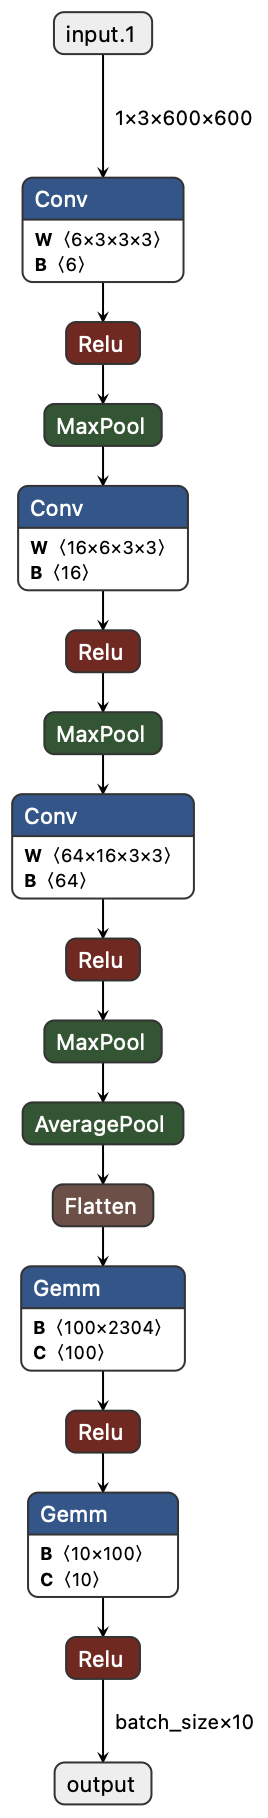

In [48]:
from IPython.display import Image

# TODO : Fill in the image file name below 
network_graph_image_file = "convnet.onnx.png"

Image(filename=network_graph_image_file)

## Question 8 [30%]

Implement in python a naive approach to convolution given a 2D kernel (2x2) and a 2D input image(4x4), stride 1 and padding 0. Do not use NumPy or PyTorch or any higher-level packages (Not even slicing, just for loops, basic arithmetic and lists). E.g., Given [[1,2,3,4], [5,6,7,8], [9,0,1,2], [3,4,5,6]] matrix as the 2D input image and [[1,2], [3,4]] as the 2D kernel the expected output for this example would be [[44, 54, 64], [44, 24, 34], [34, 34, 44]]

In [49]:
#TODO : Write the code to perform the convolution and return the result
## METHOD 1  
def convolve(image,kernel):
    subimgs = []
    convnums = []
    subimg1 = [[image[0][0], image[0][1]],[image[1][0], image[1][1]]]
    subimg2 = [[image[0][1], image[0][2]],[image[1][1], image[1][2]]]
    subimg3 = [[image[0][2], image[0][3]],[image[1][2], image[1][3]]]
    subimg4 = [[image[1][0], image[1][1]],[image[2][0], image[2][1]]]
    subimg5 = [[image[1][1], image[1][2]],[image[2][1], image[2][2]]]
    subimg6 = [[image[1][2], image[1][3]],[image[2][2], image[2][3]]]
    subimg7 = [[image[2][0], image[2][1]],[image[3][0], image[3][1]]]
    subimg8 = [[image[2][1], image[2][2]],[image[3][1], image[3][2]]]
    subimg9 = [[image[2][2], image[2][3]],[image[3][2], image[3][3]]]
    subimgs = [subimg1, subimg2, subimg3, subimg4, subimg5, subimg6, subimg7, subimg8, subimg9]
    for subimg in subimgs:
        convnum = (subimg[0][0] * kernel[0][0])+ (subimg[0][1] * kernel[0][1])+(subimg[1][0] * kernel[1][0])+(subimg[1][1] * kernel[1][1])
        convnums.append(convnum)
    convmatrix = [[convnums[0], convnums[1], convnums[2]], [convnums[3], convnums[4], convnums[5]], [convnums[6], convnums[7], convnums[8]]]
    return convmatrix 
## METHOD 2 - referenced this video: https://www.youtube.com/watch?v=BPBTmXKtFRQ
# def convolve(image, kernel): 
#     image_conv = [[0 for x in range(3)] for y in range(3)]  
#     for i in range(3): 
#         for j in range(3): 
#             convout = 0 
#             for m in range(2): 
#                 for n in range(2): 
#                     convout += kernel[m][n] * image[i+m][j+n]
#             image_conv[i][j] = convout 
#     return image_conv


    

Test your convolution operation with torch convolution function. When you run below cells there should be no errors.

In [50]:
import torch.nn.functional as F

image=[[1,2,3,4], [5,6,7,8], [9,0,1,2], [3,4,5,6]]
kernel=[[1,2], [3,4]]

convolved_image = convolve(image,kernel)

assert (convolved_image == [[44, 54, 64], [44, 24, 34], [34, 34, 44]])

print("My convolved image :", convolved_image)

image=torch.tensor([[image]])
kernel=torch.tensor([[kernel]])

convolved_image_torch = F.conv2d(image, kernel)

print("Torch convolved image :" , convolved_image_torch)

assert (convolved_image_torch == torch.tensor(convolved_image)).all()

My convolved image : [[44, 54, 64], [44, 24, 34], [34, 34, 44]]
Torch convolved image : tensor([[[[44, 54, 64],
          [44, 24, 34],
          [34, 34, 44]]]])
